In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv("Train.csv")
df_test=pd.read_csv("Test.csv")

In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace=True)
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace=True)


In [10]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

####outlet size is categorical coloumn so we have to fill it with mode imputation

In [12]:
df_train["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [13]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [15]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:

missing_values = df_train["Outlet_Size"].isnull()
missing_values


0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
df_train.loc[missing_values, 'Outlet_Size'] = df_train.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
missing_values = df_test["Outlet_Size"].isnull()
missing_values

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [19]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [20]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [21]:
df_test.loc[missing_values, 'Outlet_Size'] = df_test.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [22]:
### visiualization 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

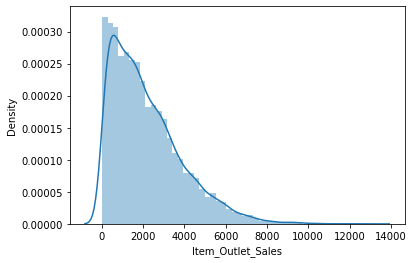

In [23]:
sns.distplot(df_train["Item_Outlet_Sales"])

<AxesSubplot:>

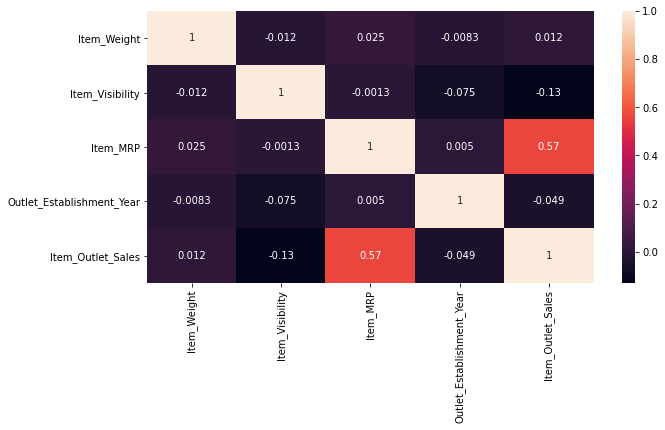

In [24]:
# correlation matrix

plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(), annot=True)

### Realisation
Item_Fat_Content: Most Items sold are low Fat.
Item_Type: Distictly fruits & veg, food snacks are popular.
Item_Type_Combined: Most Sold Item cateogory is food.
Outlet_Identifier: Sold items are ditributed evenly amoung all stores, execpt OUT010 and OUT019.
outlet_Size: Bigmart Stores are mostly in medium size in this data.
Outlet_Location_Type: Most comon type of location is Tier3
Outlet_Type: By a wide mergin Most Store Types are SuperMarket Type1.

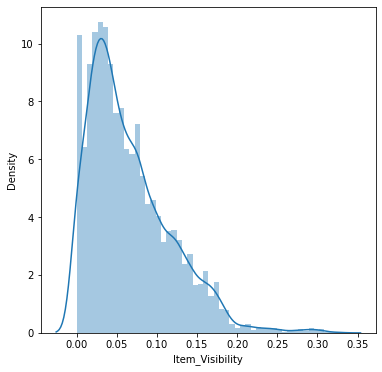

In [25]:
# Item Visibility distribution

plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Visibility'])
plt.show()

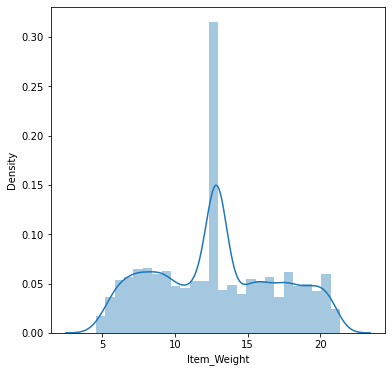

In [26]:
# Item Weight distribution

plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Weight'])
plt.show()

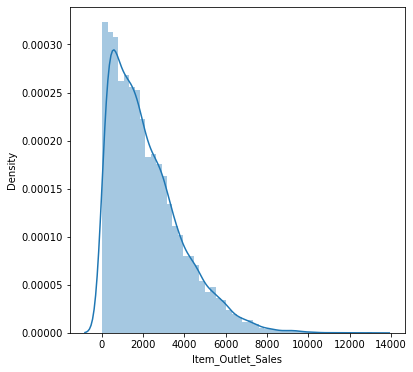

In [27]:
# Item Outlet Sales distribution

plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Outlet_Sales'])
plt.show()

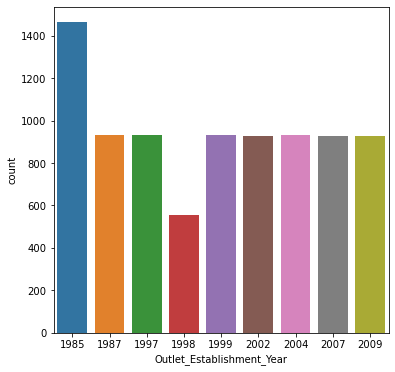

In [28]:
# Univariate Plots lets look at the countplots for categorial data

plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=df_train)
plt.show()

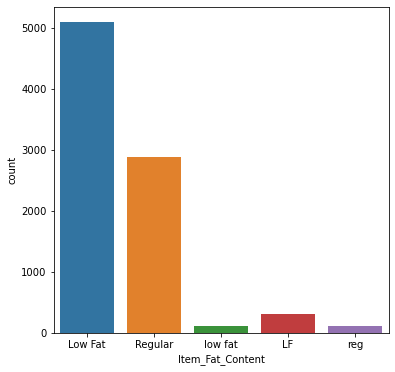

In [29]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df_train)
plt.show()

In [30]:
df_train.drop(["Item_Identifier", "Outlet_Identifier"], axis=1 ,inplace=True)
df_test.drop(["Item_Identifier", "Outlet_Identifier"], axis=1 ,inplace=True)

In [31]:
df_train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [32]:
# EDA using Pandas Profiling

# pip install pandas-profiling


In [33]:
# profile = ProfileReport(df_train, title="Pandas Profiling Report")
# profile

In [34]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [35]:
df_train.replace({"Item_Fat_Content" : {"low fat" :"Low Fat" , "LF" : "Low Fat" , "reg" : "Regular"}} , inplace=True)

In [36]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [38]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [39]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [40]:
# Label encoding

In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [42]:
df_train["Item_Fat_Content"] = encoder.fit_transform(df_train["Item_Fat_Content"])
df_train["Item_Type"] = encoder.fit_transform(df_train["Item_Type"])
df_train["Outlet_Size"] = encoder.fit_transform(df_train["Outlet_Size"])
df_train["Outlet_Location_Type"] = encoder.fit_transform(df_train["Outlet_Location_Type"])
df_train["Outlet_Type"] = encoder.fit_transform(df_train["Outlet_Type"])


In [43]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [44]:
# Finding Outliers 

<AxesSubplot:xlabel='Item_Weight'>

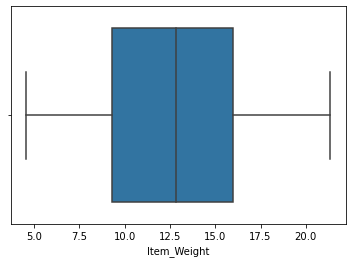

In [45]:
sns.boxplot(df_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

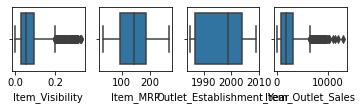

In [46]:
plt.figsize = (3,6)

plt.subplot(3,4,1)
sns.boxplot(df_train['Item_Visibility'])

plt.subplot(3,4,2)
sns.boxplot(df_train['Item_MRP'])

plt.subplot(3,4,3)
sns.boxplot(df_train['Outlet_Establishment_Year'])

plt.subplot(3,4,4)
sns.boxplot(df_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility'>

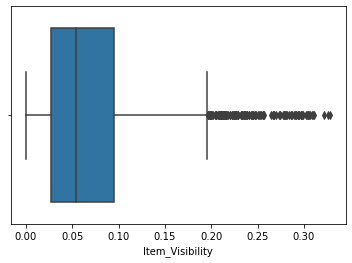

In [47]:
# Outliers handling for Item Visibility

sns.boxplot(df_train['Item_Visibility'])

In [48]:
# Using IQR Method removing ouliers
# https://www.youtube.com/watch?v=Ccv1-W5ilak

In [49]:
# IQR Method for column "Item_Visibility"

q1 = df_train["Item_Visibility"].quantile(0.25)
q2 = df_train["Item_Visibility"].quantile(0.50)
q3 = df_train["Item_Visibility"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  0.067595815
uppertail value >> 0.195979015
lowertail value >> -0.07440424500000001


In [50]:
df_train["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [51]:
df_train.loc[(df_train["Item_Visibility"] > uppertail)]


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,12.857645,1,0.255395,4,196.8794,1985,2,0,0,780.3176
83,12.857645,0,0.293418,9,194.6136,1985,2,0,0,583.2408
108,12.857645,0,0.278974,14,225.3720,1985,2,0,0,679.1160
174,17.700000,0,0.291865,6,115.1834,1998,2,2,0,345.5502
334,12.857645,0,0.204700,5,76.8670,1985,2,0,0,229.7010
...,...,...,...,...,...,...,...,...,...,...
8292,12.857645,1,0.209163,6,179.1976,1985,2,0,0,543.2928
8345,12.857645,1,0.266397,5,215.6218,1985,2,0,0,641.1654
8371,8.270000,1,0.214125,14,183.9924,1998,2,2,0,185.0924
8432,14.000000,1,0.227261,5,54.3640,1998,2,2,0,159.7920


In [52]:
# finding data without ouliers
df_train.loc[(df_train["Item_Visibility"] < lowertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [53]:
df_train.loc[(df_train["Item_Visibility"]<=uppertail) & (df_train["Item_Visibility"]>=lowertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [54]:
mean_data = df_train.loc[(df_train["Item_Visibility"]<=uppertail) & (df_train["Item_Visibility"]>=lowertail),"Item_Visibility"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

1

In [55]:
# outliers handling

In [56]:
df_train.loc[(df_train["Item_Visibility"]>uppertail),"Item_Visibility"] = mean_data

In [57]:
df_train.loc[(df_train["Item_Visibility"] > uppertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,12.857645,1,1.0,4,196.8794,1985,2,0,0,780.3176
83,12.857645,0,1.0,9,194.6136,1985,2,0,0,583.2408
108,12.857645,0,1.0,14,225.3720,1985,2,0,0,679.1160
174,17.700000,0,1.0,6,115.1834,1998,2,2,0,345.5502
334,12.857645,0,1.0,5,76.8670,1985,2,0,0,229.7010
...,...,...,...,...,...,...,...,...,...,...
8292,12.857645,1,1.0,6,179.1976,1985,2,0,0,543.2928
8345,12.857645,1,1.0,5,215.6218,1985,2,0,0,641.1654
8371,8.270000,1,1.0,14,183.9924,1998,2,2,0,185.0924
8432,14.000000,1,1.0,5,54.3640,1998,2,2,0,159.7920


<AxesSubplot:xlabel='Item_Visibility'>

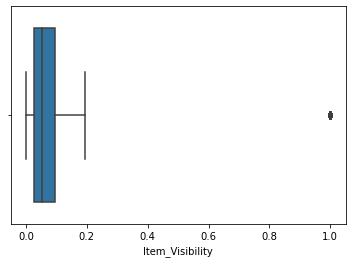

In [58]:
sns.boxplot(df_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility'>

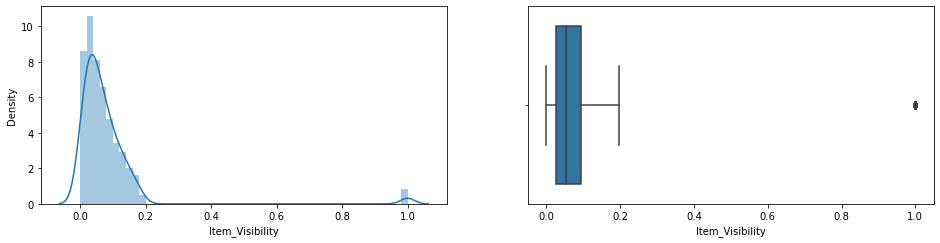

In [59]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(df_train['Item_Visibility'])

plt.subplot(2,2,2)
sns.boxplot(df_train['Item_Visibility'])

In [60]:
# To remove remaining outliers using capping method

In [61]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [62]:
df_train.Item_Visibility = df_train.Item_Visibility.apply(capping)

<AxesSubplot:xlabel='Item_Visibility'>

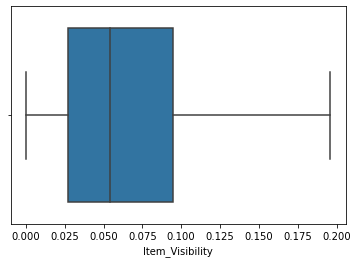

In [63]:
sns.boxplot(x = 'Item_Visibility', data = df_train)

<AxesSubplot:xlabel='Item_Visibility'>

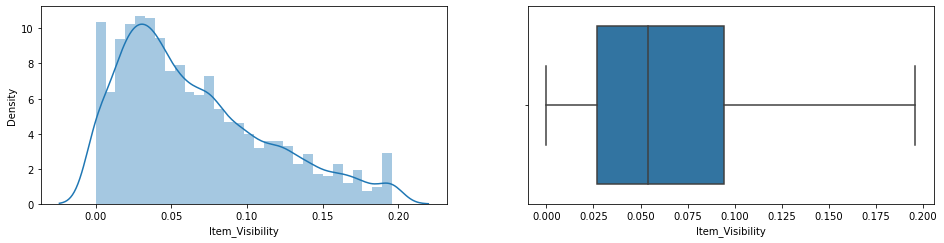

In [64]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df_train['Item_Visibility'])

plt.subplot(2,2,2)
sns.boxplot(df_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

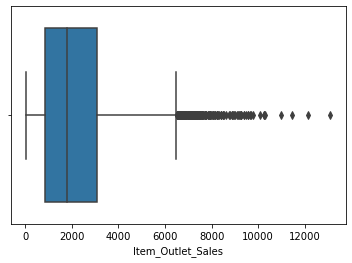

In [65]:
# Outliers handling for Outlet
sns.boxplot(df_train['Item_Outlet_Sales'])

In [66]:
# Using IQR Method removing ouliers

In [67]:
# IQR Method for column "Item_Outlet_Sales"

q1 = df_train["Item_Outlet_Sales"].quantile(0.25)
q2 = df_train["Item_Outlet_Sales"].quantile(0.50)
q3 = df_train["Item_Outlet_Sales"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  2267.049
uppertail value >> 6501.8699
lowertail value >> -2566.3261


In [68]:
df_train["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [69]:
df_train.loc[(df_train["Item_Outlet_Sales"] > uppertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,21.350000,0,0.069103,3,259.9278,2009,1,2,2,6768.5228
130,12.857645,0,0.033810,3,180.5976,1985,1,2,3,7968.2944
132,12.857645,0,0.144338,8,224.4404,1985,1,2,3,6976.2524
145,18.600000,0,0.039356,5,246.3802,1999,1,0,1,7370.4060
203,12.857645,0,0.078362,0,177.9370,1985,1,2,3,6704.6060
...,...,...,...,...,...,...,...,...,...,...
8245,16.200000,0,0.035967,6,260.3278,1999,1,0,1,7549.5062
8329,12.857645,0,0.041622,9,253.6014,1985,1,2,3,6630.0364
8350,10.000000,0,0.021421,9,248.3750,2004,2,1,1,7240.5750
8447,20.350000,0,0.089975,4,261.6594,2007,2,1,1,7588.1226


In [70]:
# finding data without ouliers
df_train.loc[(df_train["Item_Outlet_Sales"] < lowertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [71]:
df_train.loc[(df_train["Item_Outlet_Sales"]<=uppertail) & (df_train["Item_Outlet_Sales"]>=lowertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [72]:
mean_data = df_train.loc[(df_train["Item_Outlet_Sales"]<=uppertail) & (df_train["Item_Outlet_Sales"]>=lowertail),"Item_Outlet_Sales"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

2060

In [73]:
# outliers handling

In [74]:
df_train.loc[(df_train["Item_Outlet_Sales"]>uppertail),"Item_Outlet_Sales"] = mean_data

In [75]:
df_train.loc[(df_train["Item_Outlet_Sales"] > uppertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


<AxesSubplot:xlabel='Item_Outlet_Sales'>

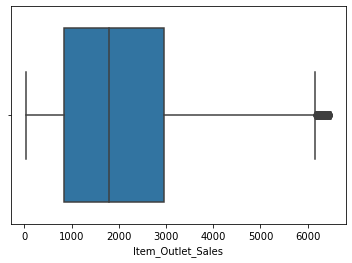

In [76]:
sns.boxplot(df_train["Item_Outlet_Sales"])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

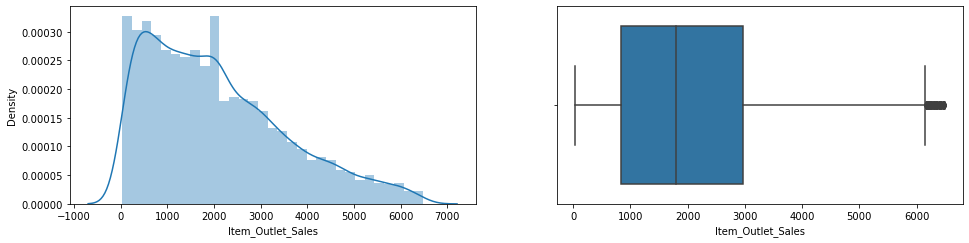

In [77]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(df_train["Item_Outlet_Sales"])

plt.subplot(2,2,2)
sns.boxplot(df_train["Item_Outlet_Sales"])

In [78]:
# To remove remaining outliers using capping method

In [79]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [80]:
df_train.Item_Outlet_Sales = df_train.Item_Outlet_Sales.apply(capping)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

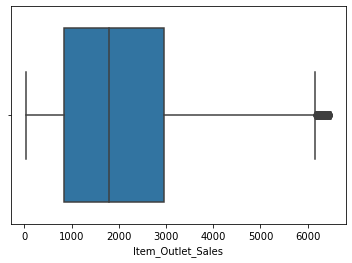

In [81]:
sns.boxplot(x = "Item_Outlet_Sales", data = df_train)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

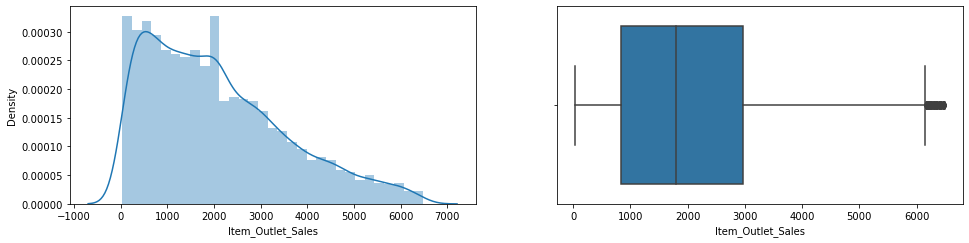

In [82]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df_train["Item_Outlet_Sales"])

plt.subplot(2,2,2)
sns.boxplot(df_train["Item_Outlet_Sales"])

In [83]:
# Splitting data into train and test 

In [84]:
x=df_train.drop("Item_Outlet_Sales",axis =1)

In [85]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,1998,2,2,0
4,8.93,0,0.000000,9,53.8614,1987,0,2,1


In [86]:
y=df_train["Item_Outlet_Sales"]

In [87]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=45)

In [89]:
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,14.500000,0,0.089960,8,159.5604,2002,2,1,1
3286,12.857645,1,0.073562,4,254.9356,1985,1,2,3
3798,13.000000,0,0.041825,9,256.7014,1997,2,0,1
696,12.600000,0,0.007450,9,186.7556,1987,0,2,1
7646,13.650000,1,0.026602,10,35.1532,1997,2,0,1


In [90]:
x_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4454,12.800000,0,0.069902,15,261.3252,2009,1,2,2
4743,18.500000,0,0.025740,10,89.4172,1987,0,2,1
3017,12.857645,0,0.195979,8,223.8404,1985,2,0,0
5753,11.800000,1,0.057538,10,149.8366,2002,2,1,1
1478,12.857645,0,0.026055,6,169.5474,1985,1,2,3


In [91]:
# standardization

In [92]:
x.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.065307,7.226681,140.992782,1997.831867,1.453596,1.112871,1.201220
std,4.226124,0.477836,0.048841,4.209990,62.275067,8.371760,0.683084,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,2.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.195979,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [93]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [94]:
x_train_std = sc.fit_transform(x_train)
x_train_std

array([[ 3.91407215e-01, -7.37560750e-01,  4.99509690e-01, ...,
         7.85176681e-01, -1.38605727e-01, -2.41779625e-01],
       [ 2.46051051e-03,  1.35582052e+00,  1.64529847e-01, ...,
        -6.82355926e-01,  1.09930111e+00,  2.28220505e+00],
       [ 3.61733453e-02, -7.37560750e-01, -4.83824416e-01, ...,
         7.85176681e-01, -1.37651256e+00, -2.41779625e-01],
       ...,
       [-1.24266859e+00,  1.35582052e+00,  2.66529890e+00, ...,
         7.85176681e-01,  1.09930111e+00, -1.50377196e+00],
       [-1.10412738e+00, -7.37560750e-01, -3.83264858e-01, ...,
         7.85176681e-01, -1.38605727e-01, -2.41779625e-01],
       [-1.04847407e+00, -7.37560750e-01,  2.50063895e+00, ...,
         7.85176681e-01,  1.09930111e+00, -1.50377196e+00]])

In [95]:
x_test_std = sc.transform(x_test)
x_test_std

array([[-1.11911707e-02, -7.37560750e-01,  8.97612969e-02, ...,
        -6.82355926e-01,  1.09930111e+00,  1.02021271e+00],
       [ 1.33869754e+00, -7.37560750e-01, -8.12399559e-01, ...,
        -2.14988853e+00,  1.09930111e+00, -2.41779625e-01],
       [ 2.46051051e-03, -7.37560750e-01,  2.66529890e+00, ...,
         7.85176681e-01, -1.37651256e+00, -1.50377196e+00],
       ...,
       [-1.29240133e+00, -7.37560750e-01,  5.67892662e-01, ...,
         7.85176681e-01, -1.38605727e-01, -2.41779625e-01],
       [-7.92705685e-01,  1.35582052e+00,  7.96296651e-01, ...,
         7.85176681e-01, -1.38605727e-01, -2.41779625e-01],
       [-9.24142216e-01,  1.35582052e+00,  4.55862764e-01, ...,
         7.85176681e-01, -1.38605727e-01, -2.41779625e-01]])

### model building

1.linear regression

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [97]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [98]:
# Training model

y_pred_train = lr.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE = ",mse)
r2 = r2_score(y_train,y_pred_train)*100
print("r2 score = ",r2)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE = ",mae)

MSE =  1185438.512585639
r2 score =  45.43323599409882
MAE =  841.6227483377969


In [99]:
# Testing model 

y_pred_test = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("MSE = ",mse)
r2 = r2_score(y_test,y_pred_test)*100
print("r2 score = ",r2)
mae = mean_absolute_error(y_test,y_pred_test)
print("MAE = ",mae)

MSE =  1288449.871214345
r2 score =  44.538084168747424
MAE =  878.4155042653448


### Random Forest Regression Algorithm

In [100]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [101]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [102]:
# Training model of RandomforestRgeressor 
print(rfr.score(x_train,y_train))

0.9302997326585856


In [103]:
# Testing model of RandomforestRgeressor 

In [104]:
print(rfr.score(x_test,y_test))

0.5081376043325885


In [105]:
rfr_pred=rfr.predict(x_test)

In [106]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test, rfr_pred)*100
print("Accuracy score for RFR:",rfr_score)

Accuracy score for RFR: 50.81376043325885


###  Hyperparameter for RFR

In [107]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(x_train_std, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    6.6s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   20.8s finished


Best: 0.509 using {'n_estimators': 1000}
0.466 (0.005) with: {'n_estimators': 10}
0.506 (0.004) with: {'n_estimators': 100}
0.509 (0.002) with: {'n_estimators': 1000}


In [108]:
grid_search_forest.best_params_


{'n_estimators': 1000}

In [109]:
grid_search_forest.best_score_

0.5093744907923865

In [110]:

y_pred_rf_grid=grid_search_forest.predict(x_test_std)

In [111]:

r2_score(y_test,y_pred_rf_grid)

0.509908865238071

### XG Boost Regressor

In [116]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [117]:
xgbr = XGBRegressor()
print (xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [118]:
xgbr.fit(x_train,y_train)
score = xgbr.score(x_train,y_train)
print ("Training Score =", score)

Training Score = 0.8437672761657923


In [120]:
test_score = xgbr.score(x_test,y_test)*100
print ("Testing Score =", test_score)

Testing Score = 48.480178043493915


In [121]:
cv_score = cross_val_score(xgbr, x_train, y_train, cv=10)
print ("CV mean score =",cv_score.mean())

CV mean score = 0.4720538996481432


In [122]:
y_pred= xgbr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print ("MSE =",mse)
print ("RMSE =",mse*(1/2.0))

MSE = 1196870.0858948869
RMSE = 598435.0429474434


### KNN Regressor

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve

In [124]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [125]:
## Training

y_pred_Knn_train = knn_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred_Knn_train)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_train,y_pred_Knn_train)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_train,y_pred_Knn_train)
print("R2_score",R2_SCORE)

MSE 902479.810540877
********************
MAE 708.871900194435
********************
R2_score 0.5845807073159619


In [126]:
# Testing

y_pred_Knn_test = knn_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred_Knn_test)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_test,y_pred_Knn_test)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_test,y_pred_Knn_test)*100
print("R2_score",R2_SCORE)

MSE 1440633.1668660557
********************
MAE 892.4759157763003
********************
R2_score 37.987284387609755


##  XG Boost

In [127]:
xgbr.fit(x_train,y_train)
score = xgbr.score(x_train,y_train)
print ("Training Score =", score)

Training Score = 0.8437672761657923


In [128]:
XG_test_score = xgbr.score(x_test,y_test)*100
print ("Testing Score =", XG_test_score)

Testing Score = 48.480178043493915


In [129]:
cv_score = cross_val_score(xgbr, x_train, y_train, cv=10)
print ("CV mean score =",cv_score.mean())

CV mean score = 0.4720538996481432


In [130]:
y_pred= xgbr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print ("MSE =",mse)
print ("RMSE =",mse*(1/2.0))

MSE = 1196870.0858948869
RMSE = 598435.0429474434


## Decision Tree Regressor

In [131]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [133]:
# Training

y_pred_dtr_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_dtr_train)
print("mse =",mse)

mae = mean_absolute_error(y_train,y_pred_dtr_train)
print("mae =",mae)
r2_value =r2_score(y_train,y_pred_dtr_train)
print("R- squared =",r2_value)

mse = 0.0
mae = 0.0
R- squared = 1.0


In [134]:
# Testing

y_pred_dtr_test = dt_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_dtr_test)
print("mse =",mse)

mae = mean_absolute_error(y_test,y_pred_dtr_test)
print("mae =",mae)
DT_r2_value =r2_score(y_test,y_pred_dtr_test)*100
print("R- squared =",DT_r2_value)

mse = 2169968.3355465466
mae = 1042.3146070394994
R- squared = 6.59271744182246


In [ ]:
## pd.DataFrame({"Model Names":['Linear Reg','XG Boost','KNN Reg','Decision Tree Reg','RandomForest Reg'],"Accuracy socre":[test_lr_r2, XG_test_score, R2_SCORE, DT_r2_value, rfr_score]})

In [135]:
import pickle 
# Saving model to disk
pickle.dump(rfr_pred, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))